## Sasol Customer Retention Recruitment Competition

In [138]:
import pandas as pd
import numpy as np

# EDA Libraries
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

# Evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.calibration import calibration_curve



In [28]:
!pip install seaborn

     ------------------------------------ 294.6/294.6 kB 568.7 kB/s eta 0:00:00


In [20]:
!pip install plotly

     --------------------------------------- 15.6/15.6 MB 17.2 MB/s eta 0:00:00


In [2]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 229F-C175

 Directory of c:\Users\UKASHI\Documents\Github\ukachi-data-science\sasol-customer-retention

16/11/2023  00:31    <DIR>          .
16/11/2023  00:31    <DIR>          ..
16/11/2023  00:31             2,171 project-1.ipynb
16/11/2023  00:25         6,842,296 SampleSubmission.csv
16/11/2023  00:26        36,386,546 Test.csv
16/11/2023  00:26       147,175,227 Train.csv
16/11/2023  00:25               796 VariableDescription.csv
               5 File(s)    190,407,036 bytes
               2 Dir(s)  156,459,511,808 bytes free


In [5]:
train_data = pd.read_csv('Train.csv')
test_data = pd.read_csv('Test.csv')

In [6]:
data_desc = pd.read_csv('VariableDescription.csv')

In [8]:
data_desc

Variable Definitions                                         Unnamed: 2
0                   NaN  The churn dataset includes 19 variables includ...
1                    ID                                                NaN
2                region                        the location of each client
3                tenure                            duration in the network
4                Amount                                      top-up amount
5      refill_frequency              number of times the customer refilled
6               revenue                     monthly revenue of each client
7          arpu_segment                           revenue over 90 days / 3
8             frequency     number of times the client has made an revenue
9           data_volume                              number of connections
10               on_net                                call within network
11            Procuct_1                                  call to Procuct_1
12            Procuct_2                                  call to Procuct_2
13                zone1                                     call to zones1
14                zone2                                     call to zones2
15                  mrg                              a client who is going
16           regularity   number of times the client is active for 90 days
17             top_pack                              the most active packs
18        freq_top_pack  number of times the client has activated the t...
19               Target                                variable to predict

## Let us understand the data

In [9]:
train_data.head()

ID     region        tenure   Amount  refill_frequency  \
0  ID_YEB05X4KUGPQ        NaN  K > 24 month      NaN               NaN   
1  ID_Z9IQ9QH52KVN     Nebula  K > 24 month  4764.96              41.0   
2  ID_YZSU7B7M35QS  Celestial  K > 24 month  5769.23              22.0   
3  ID_QS4F5LEX29KM        NaN  K > 24 month      NaN               NaN   
4  ID_8IYIC9PFU8U1  Eclipsara  K > 24 month  5341.88              58.0   

   revenue  arpu_segment  frequency  data_volume  on_net  Procuct_1  \
0      NaN           NaN        NaN          NaN     NaN        NaN   
1  4756.84       1585.47       41.0          2.0   626.0       24.0   
2  5769.23       1923.08       22.0      28121.0     0.0        NaN   
3      NaN           NaN        NaN          NaN     NaN        NaN   
4  5636.75       1879.06       60.0       1131.0   546.0      376.0   

   Procuct_2  zone1  zone2 mrg  regularity                        top_pack  \
0        NaN    NaN    NaN  NO           3                             NaN   
1        NaN    NaN    NaN  NO          62  On net 200F=Unlimited _call24H   
2        1.0    NaN    NaN  NO          61                             NaN   
3        NaN    NaN    NaN  NO           6                             NaN   
4        0.0    NaN    NaN  NO          62     Mixt 250F=Unlimited_call24H   

   freq_top_pack  Target  
0            NaN       0  
1           31.0       0  
2            NaN       0  
3            NaN       0  
4           31.0       0

In [10]:
test_data.head()

ID     region        tenure   Amount  refill_frequency  \
0  ID_LZ8K373W7EWV   Droidika  K > 24 month  2008.55              16.0   
1  ID_04KNWHGV5783   Luminous  K > 24 month  2991.45              14.0   
2  ID_CXS07G6VLB2U     Astral  K > 24 month  1581.20               8.0   
3  ID_N3NFJJVHS25K  Eclipsara  K > 24 month  2564.10              12.0   
4  ID_R36J4ROT93E9        NaN  K > 24 month      NaN               NaN   

   revenue  arpu_segment  frequency  data_volume  on_net  Procuct_1  \
0  2010.26        670.09       17.0         10.0   247.0       17.0   
1  2991.45        997.01       17.0          NaN    99.0      100.0   
2  1578.21        526.07        8.0        436.0    47.0      113.0   
3  2777.78        926.07       13.0          0.0   135.0      181.0   
4      NaN           NaN        NaN          NaN     NaN        NaN   

   Procuct_2  zone1  zone2 mrg  regularity                        top_pack  \
0       70.0    NaN    NaN  NO          59  On net 200F=Unlimited _call24H   
1       84.0    NaN    NaN  NO          49           All-net 500F=2000F;5d   
2        5.0    NaN    NaN  NO          13                     Jokko_Daily   
3        NaN    NaN    NaN  NO          53           All-net 500F=2000F;5d   
4        NaN    NaN    NaN  NO           1                             NaN   

   freq_top_pack  
0           11.0  
1           12.0  
2            6.0  
3           13.0  
4            NaN

In [12]:
data_1 = train_data.drop(columns=['Target'], axis=1)
data_1.head()

ID     region        tenure   Amount  refill_frequency  \
0  ID_YEB05X4KUGPQ        NaN  K > 24 month      NaN               NaN   
1  ID_Z9IQ9QH52KVN     Nebula  K > 24 month  4764.96              41.0   
2  ID_YZSU7B7M35QS  Celestial  K > 24 month  5769.23              22.0   
3  ID_QS4F5LEX29KM        NaN  K > 24 month      NaN               NaN   
4  ID_8IYIC9PFU8U1  Eclipsara  K > 24 month  5341.88              58.0   

   revenue  arpu_segment  frequency  data_volume  on_net  Procuct_1  \
0      NaN           NaN        NaN          NaN     NaN        NaN   
1  4756.84       1585.47       41.0          2.0   626.0       24.0   
2  5769.23       1923.08       22.0      28121.0     0.0        NaN   
3      NaN           NaN        NaN          NaN     NaN        NaN   
4  5636.75       1879.06       60.0       1131.0   546.0      376.0   

   Procuct_2  zone1  zone2 mrg  regularity                        top_pack  \
0        NaN    NaN    NaN  NO           3                             NaN   
1        NaN    NaN    NaN  NO          62  On net 200F=Unlimited _call24H   
2        1.0    NaN    NaN  NO          61                             NaN   
3        NaN    NaN    NaN  NO           6                             NaN   
4        0.0    NaN    NaN  NO          62     Mixt 250F=Unlimited_call24H   

   freq_top_pack  
0            NaN  
1           31.0  
2            NaN  
3            NaN  
4           31.0

In [17]:
all_data = pd.concat([data_1, test_data])

In [74]:
all_data.head()

ID     region        tenure   Amount  refill_frequency  \
0  ID_YEB05X4KUGPQ        NaN  K > 24 month      NaN               NaN   
1  ID_Z9IQ9QH52KVN     Nebula  K > 24 month  4764.96              41.0   
2  ID_YZSU7B7M35QS  Celestial  K > 24 month  5769.23              22.0   
3  ID_QS4F5LEX29KM        NaN  K > 24 month      NaN               NaN   
4  ID_8IYIC9PFU8U1  Eclipsara  K > 24 month  5341.88              58.0   

   revenue  arpu_segment  frequency  data_volume  on_net  Procuct_1  \
0      NaN           NaN        NaN          NaN     NaN        NaN   
1  4756.84       1585.47       41.0          2.0   626.0       24.0   
2  5769.23       1923.08       22.0      28121.0     0.0        NaN   
3      NaN           NaN        NaN          NaN     NaN        NaN   
4  5636.75       1879.06       60.0       1131.0   546.0      376.0   

   Procuct_2  zone1  zone2 mrg  regularity                        top_pack  \
0        NaN    NaN    NaN  NO           3                             NaN   
1        NaN    NaN    NaN  NO          62  On net 200F=Unlimited _call24H   
2        1.0    NaN    NaN  NO          61                             NaN   
3        NaN    NaN    NaN  NO           6                             NaN   
4        0.0    NaN    NaN  NO          62     Mixt 250F=Unlimited_call24H   

   freq_top_pack  
0            NaN  
1           31.0  
2            NaN  
3            NaN  
4           31.0

In [19]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1887961 entries, 0 to 380126
Data columns (total 18 columns):
 #   Column            Dtype  
---  ------            -----  
 0   ID                object 
 1   region            object 
 2   tenure            object 
 3   Amount            float64
 4   refill_frequency  float64
 5   revenue           float64
 6   arpu_segment      float64
 7   frequency         float64
 8   data_volume       float64
 9   on_net            float64
 10  Procuct_1         float64
 11  Procuct_2         float64
 12  zone1             float64
 13  zone2             float64
 14  mrg               object 
 15  regularity        int64  
 16  top_pack          object 
 17  freq_top_pack     float64
dtypes: float64(12), int64(1), object(5)
memory usage: 273.7+ MB


In [ ]:
# Create a pairplot
sns.pairplot(train_data, hue='Target')

In [76]:
# Identify and remove categorical columns
non_categorical_columns = train_df.select_dtypes(exclude=['object']).columns
train_df = train_df[non_categorical_columns]

Index(['Amount', 'refill_frequency', 'revenue', 'arpu_segment', 'frequency',
       'data_volume', 'on_net', 'Procuct_1', 'Procuct_2', 'zone1', 'zone2',
       'regularity', 'freq_top_pack', 'Target'],
      dtype='object')

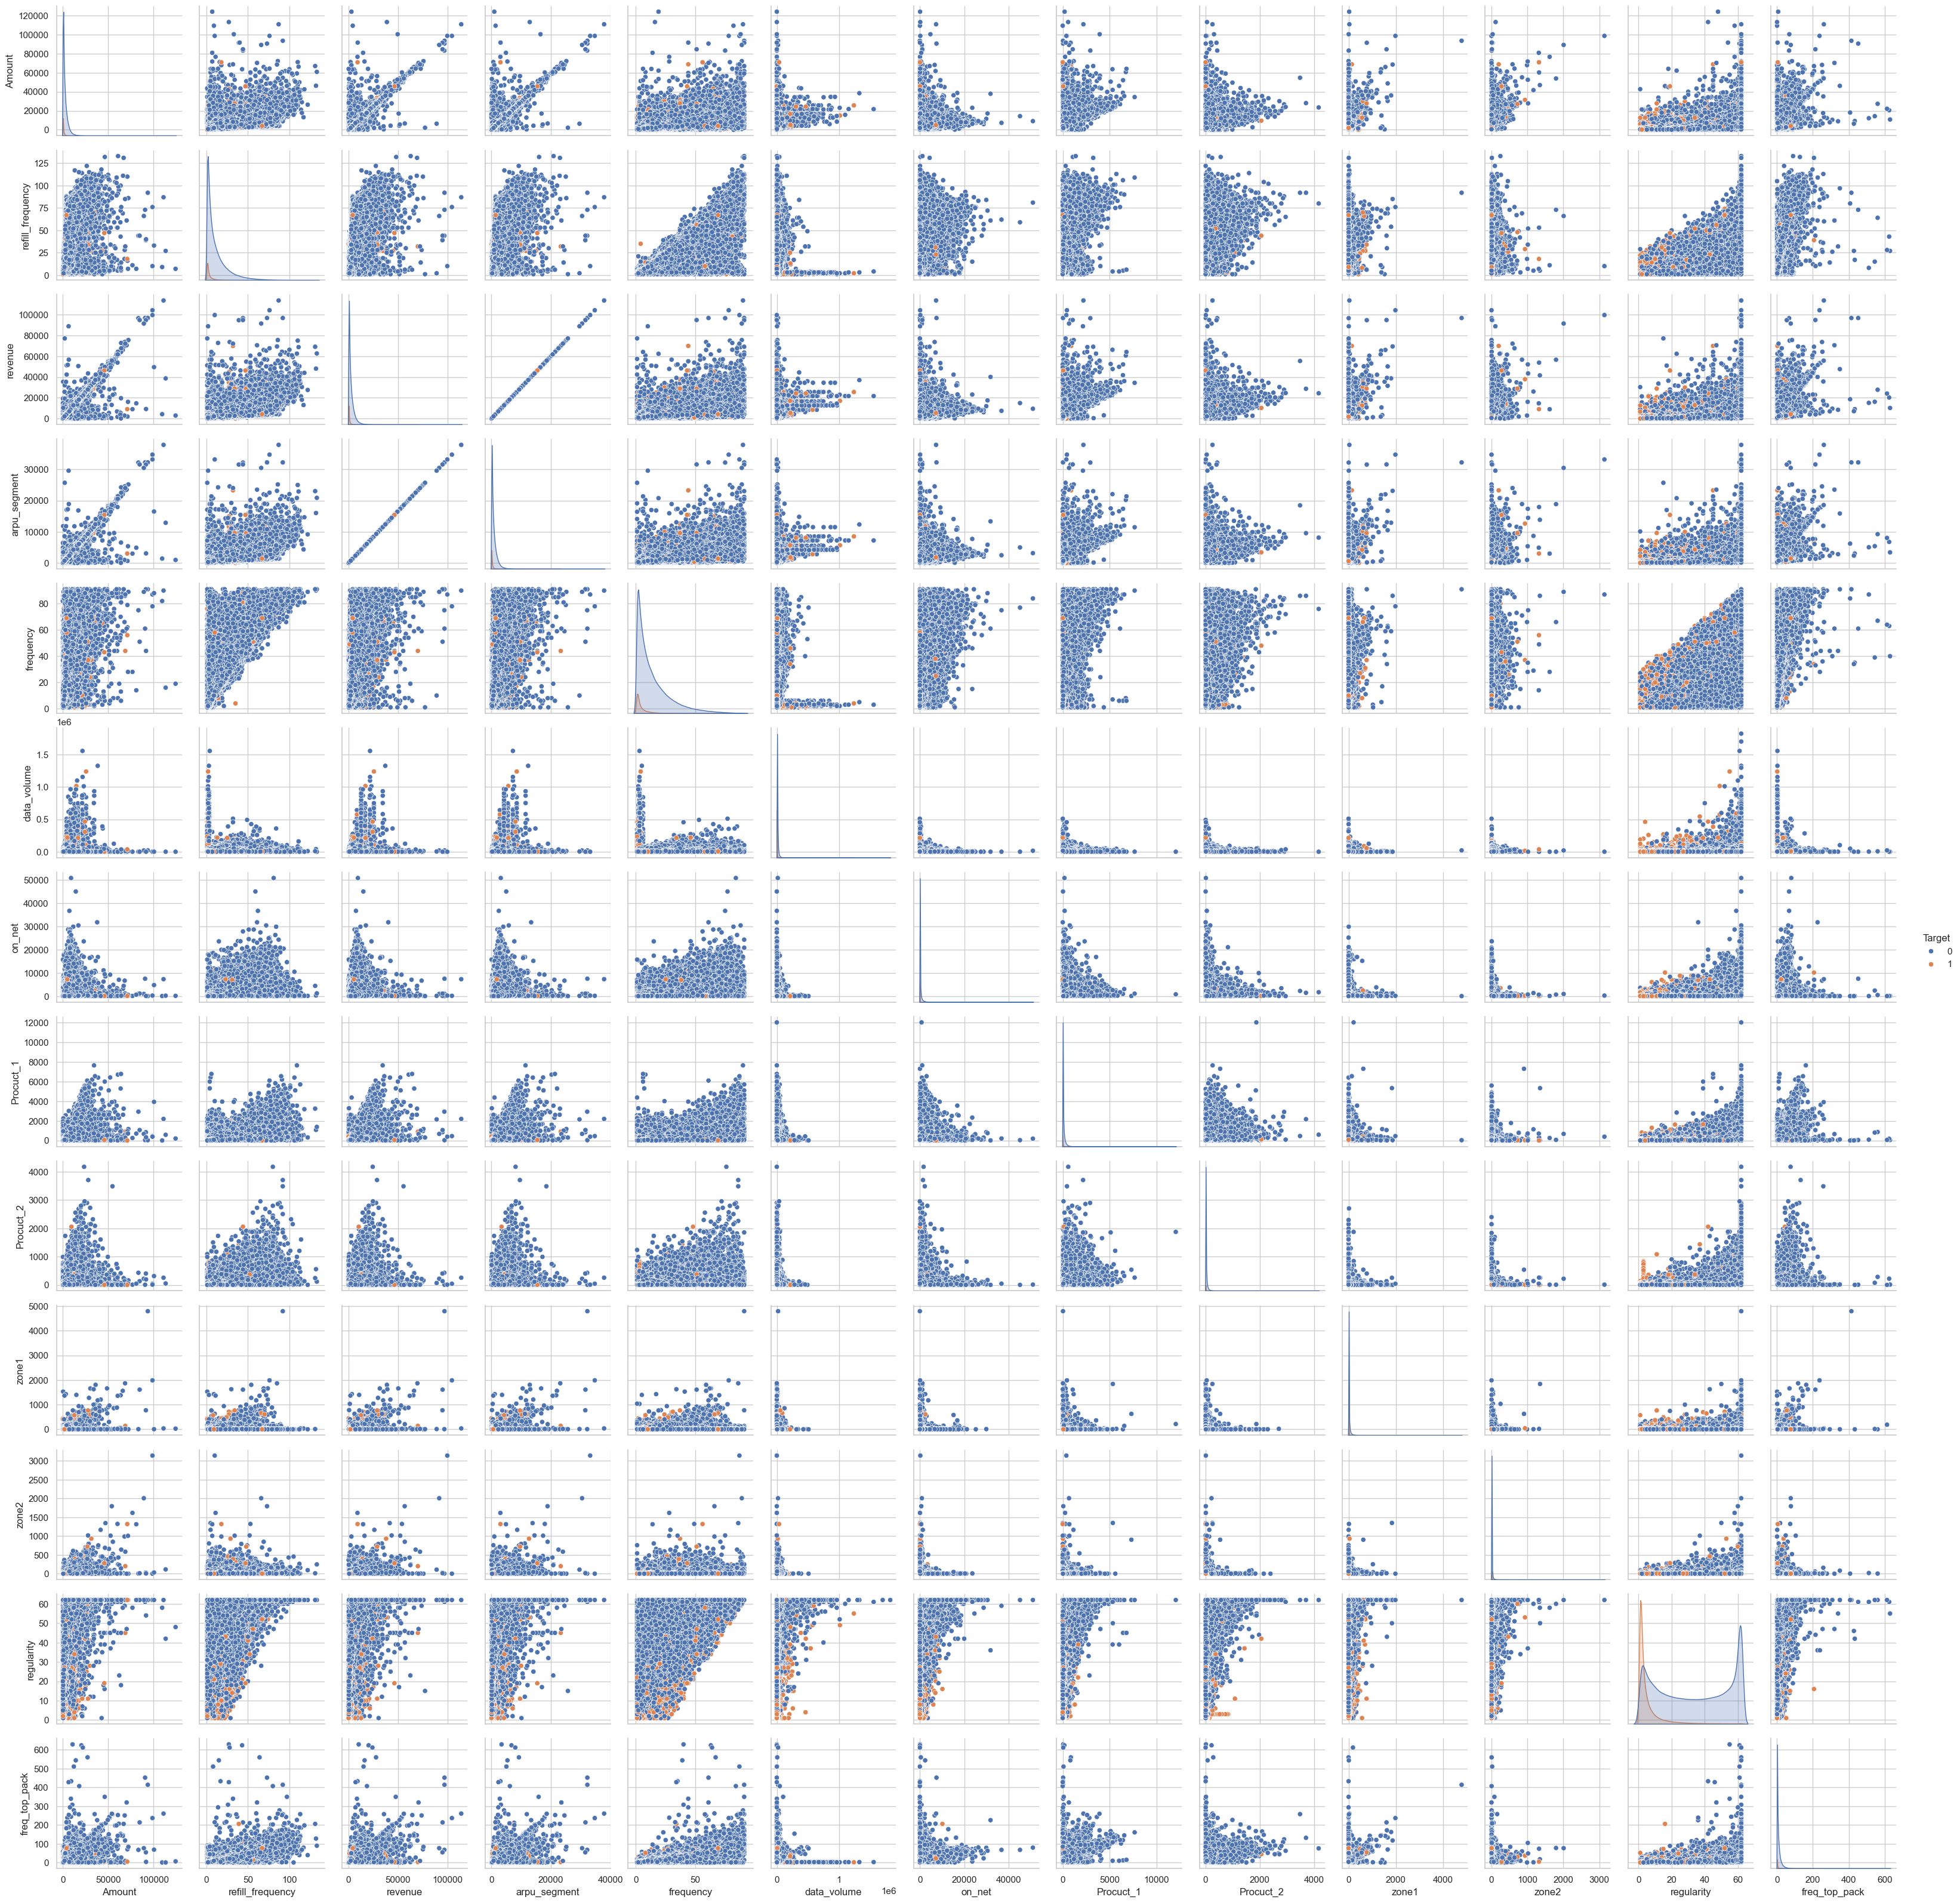

In [77]:
# Create a pairplot
sns.pairplot(train_df, hue='Target')

In [26]:
# Create a box plot using Plotly Express
fig = px.box(train_data, x='Target', y='Amount', title='Box Plot Example')

# Show the plot
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

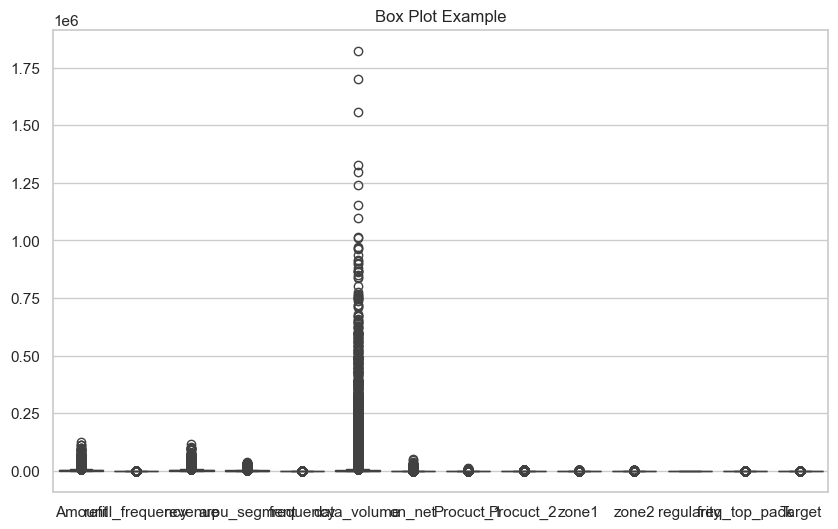

In [30]:
# Create a box plot using Seaborn
sns.set(style="whitegrid")  # Set the style of the plot
plt.figure(figsize=(10, 6))  # Set the size of the plot

sns.boxplot(data=train_data)
plt.title('Box Plot Example')

# Show the plot
plt.show()

### 0 - Not Churned; 1 - Churned

In [31]:
box_plot_1 = train_data[['Target', 'Amount']]

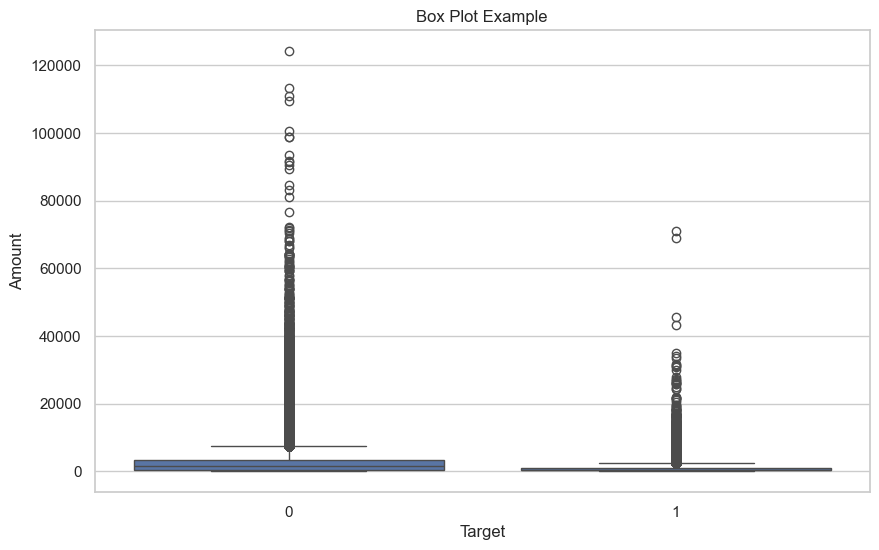

In [33]:
# Create a box plot using Seaborn
sns.set(style="whitegrid")  # Set the style of the plot
plt.figure(figsize=(10, 6))  # Set the size of the plot

sns.boxplot(data=box_plot_1, x='Target', y='Amount')
plt.title('Box Plot Example')

# Show the plot
plt.show()

- With this diagram we can see that those who are not churned make more volume of transactions compared to those who are churned.

In [34]:
box_plot_1.describe()

Target         Amount
count  1.507834e+06  978320.000000
mean   1.873648e-01    2361.212767
std    3.902042e-01    3028.954909
min    0.000000e+00       4.270000
25%    0.000000e+00     427.350000
50%    0.000000e+00    1282.050000
75%    0.000000e+00    3141.030000
max    1.000000e+00  124145.300000

In [35]:
train_data['Target'].value_counts()

0    1225319
1     282515
Name: Target, dtype: int64

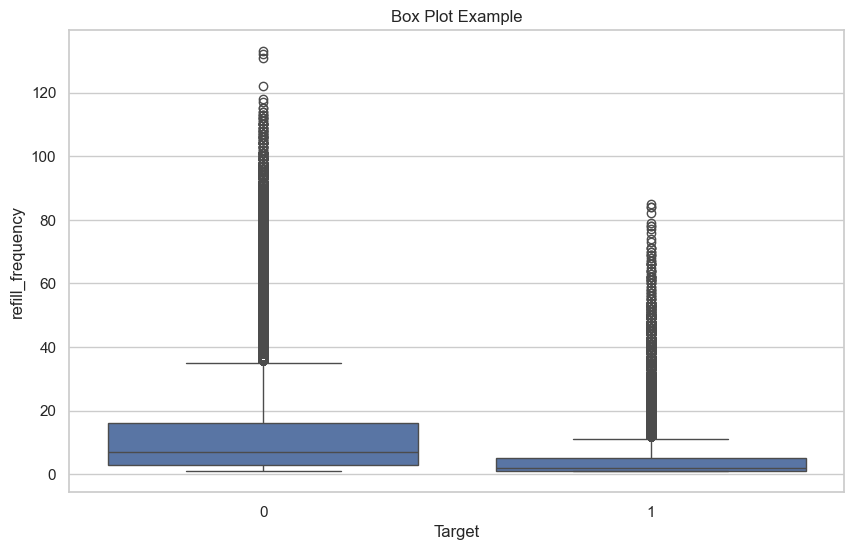

In [36]:
# Create a box plot using Seaborn
sns.set(style="whitegrid")  # Set the style of the plot
plt.figure(figsize=(10, 6))  # Set the size of the plot

sns.boxplot(data=train_data, x='Target', y='refill_frequency')
plt.title('Box Plot Example')

# Show the plot
plt.show()

- With this diagram we can see that those who are not churned make more volume of refills compared to those who are churned.

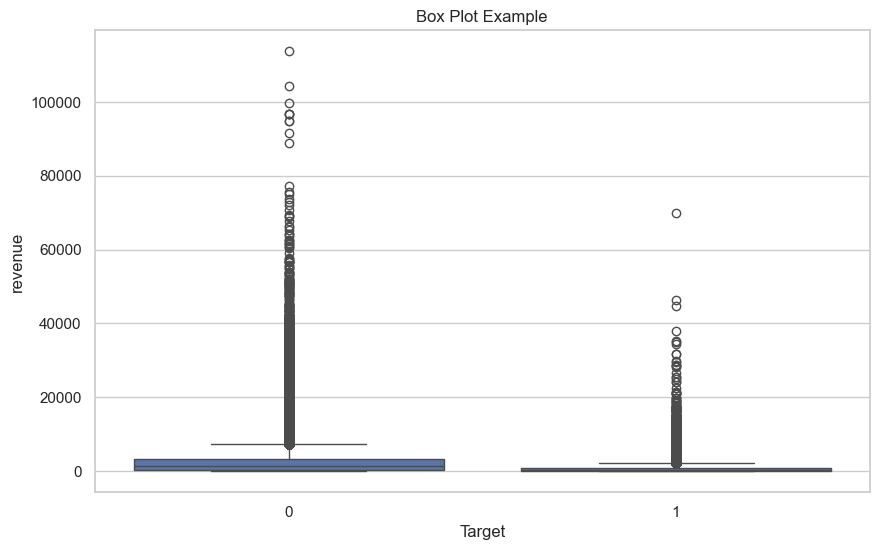

In [38]:
# Create a box plot using Seaborn
sns.set(style="whitegrid")  # Set the style of the plot
plt.figure(figsize=(10, 6))  # Set the size of the plot

sns.boxplot(data=train_data, x='Target', y='revenue')
plt.title('Box Plot Example')

# Show the plot
plt.show()

- Volume of revenue difference is also significant - those who are not churned have more revenue compared to those who are churned

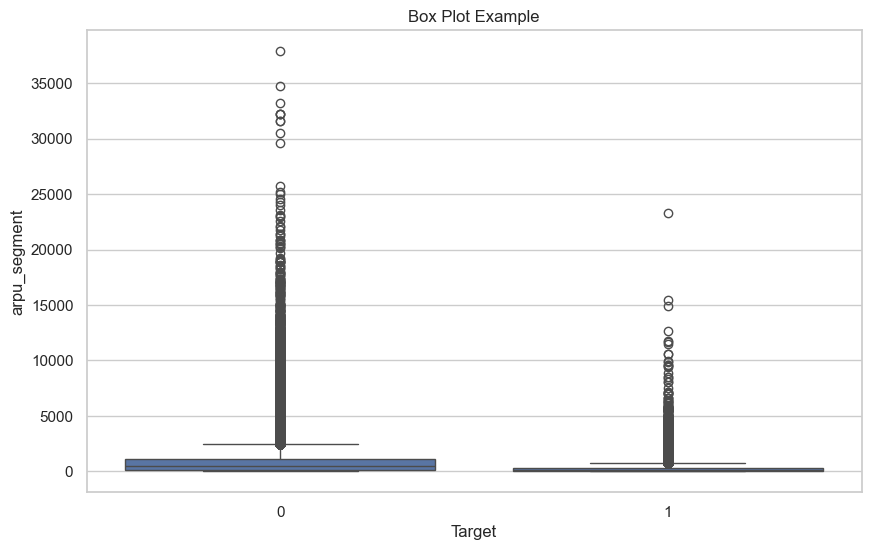

In [39]:
# Create a box plot using Seaborn
sns.set(style="whitegrid")  # Set the style of the plot
plt.figure(figsize=(10, 6))  # Set the size of the plot

sns.boxplot(data=train_data, x='Target', y='arpu_segment')
plt.title('Box Plot Example')

# Show the plot
plt.show()

More arpu revenue compared to churned customers but we have to be careful to know whether these numbers are attributed to the volume of population

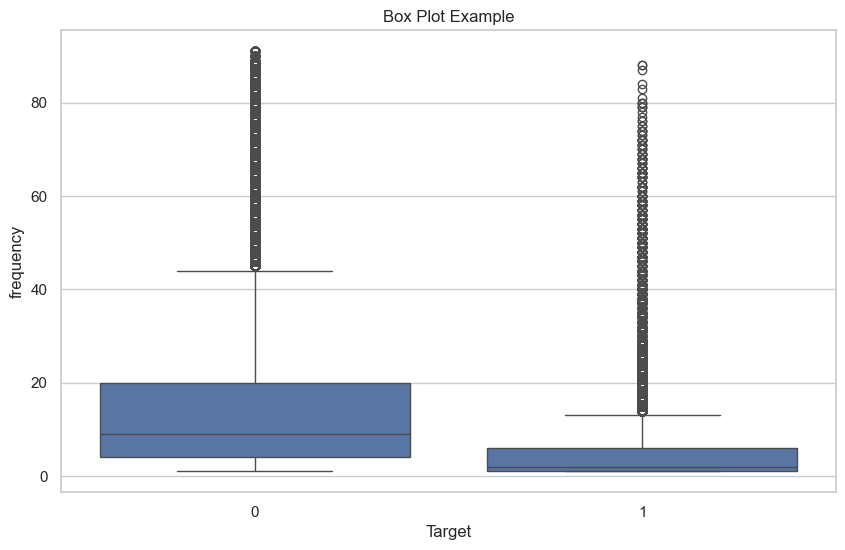

In [40]:
# Create a box plot using Seaborn
sns.set(style="whitegrid")  # Set the style of the plot
plt.figure(figsize=(10, 6))  # Set the size of the plot

sns.boxplot(data=train_data, x='Target', y='frequency')
plt.title('Box Plot Example')

# Show the plot
plt.show()

Those who are not churned are making more ad revenue that those who are churned

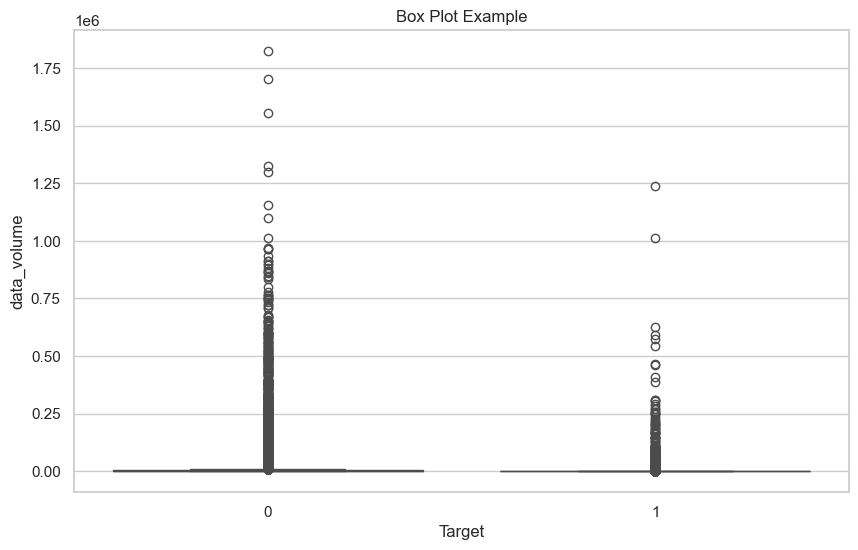

In [41]:
# Create a box plot using Seaborn
sns.set(style="whitegrid")  # Set the style of the plot
plt.figure(figsize=(10, 6))  # Set the size of the plot

sns.boxplot(data=train_data, x='Target', y='data_volume')
plt.title('Box Plot Example')

# Show the plot
plt.show()

The volume of connections are also significantly different.

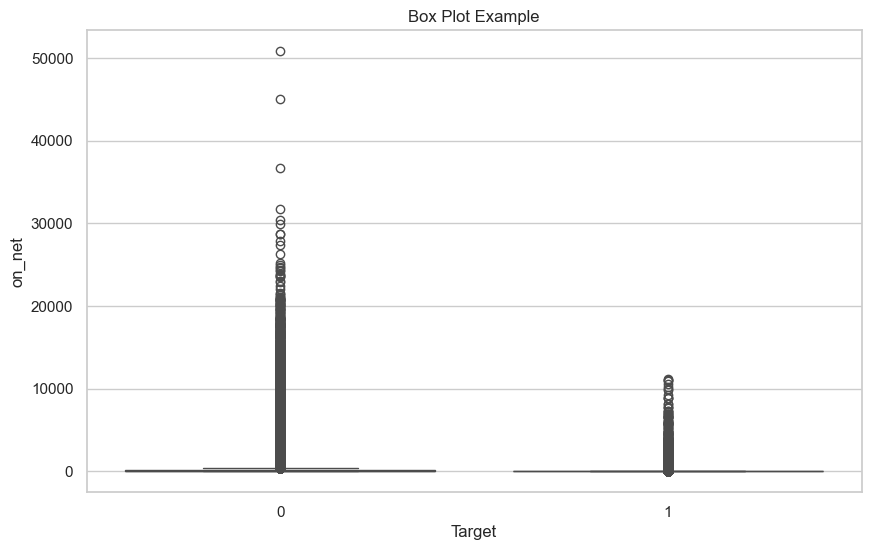

In [42]:
# Create a box plot using Seaborn
sns.set(style="whitegrid")  # Set the style of the plot
plt.figure(figsize=(10, 6))  # Set the size of the plot

sns.boxplot(data=train_data, x='Target', y='on_net')
plt.title('Box Plot Example')

# Show the plot
plt.show()

Volume of calls are also significantly different.

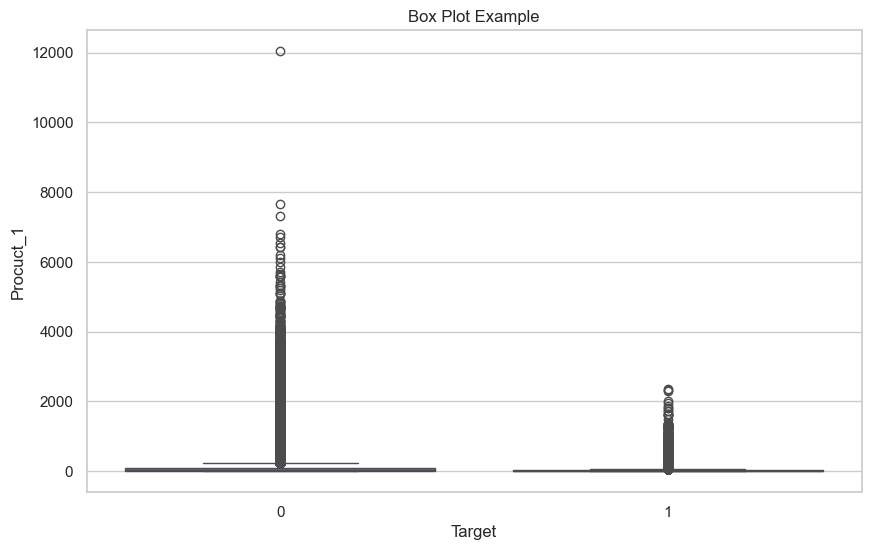

In [43]:
# Create a box plot using Seaborn
sns.set(style="whitegrid")  # Set the style of the plot
plt.figure(figsize=(10, 6))  # Set the size of the plot

sns.boxplot(data=train_data, x='Target', y='Procuct_1')
plt.title('Box Plot Example')

# Show the plot
plt.show()

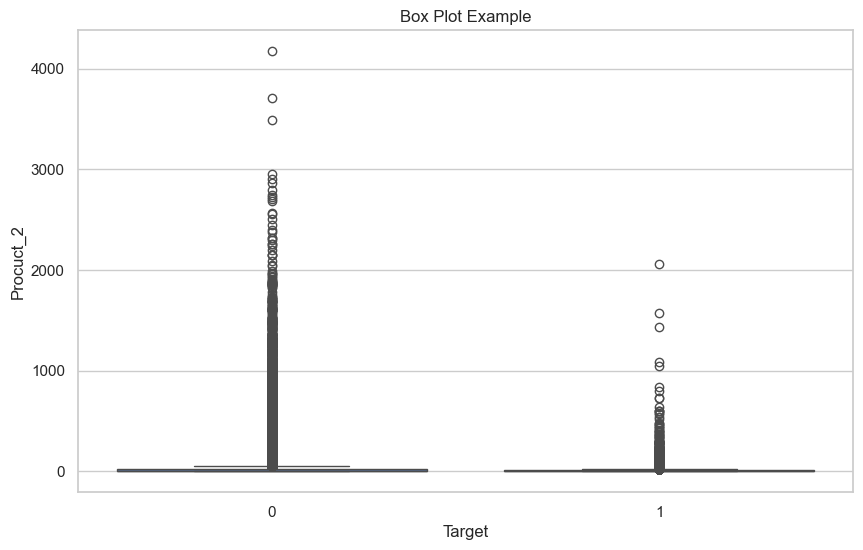

In [44]:
# Create a box plot using Seaborn
sns.set(style="whitegrid")  # Set the style of the plot
plt.figure(figsize=(10, 6))  # Set the size of the plot

sns.boxplot(data=train_data, x='Target', y='Procuct_2')
plt.title('Box Plot Example')

# Show the plot
plt.show()

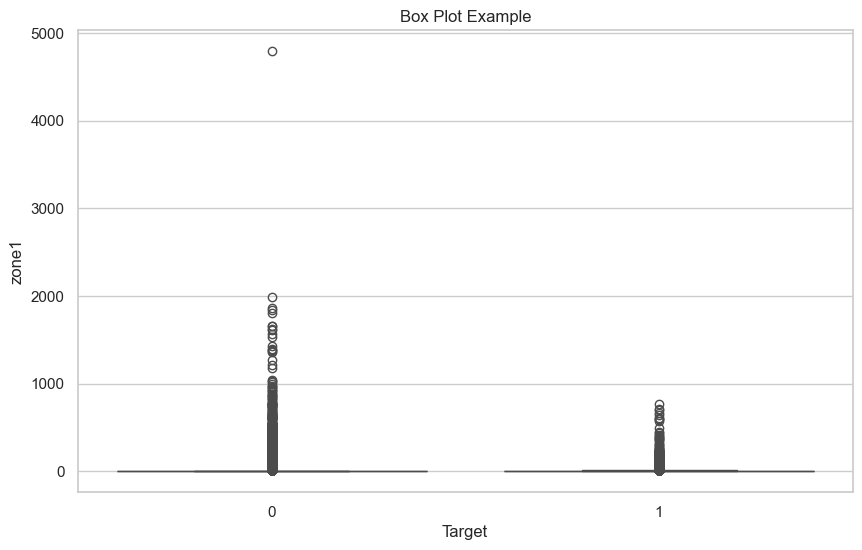

In [45]:
# Create a box plot using Seaborn
sns.set(style="whitegrid")  # Set the style of the plot
plt.figure(figsize=(10, 6))  # Set the size of the plot

sns.boxplot(data=train_data, x='Target', y='zone1')
plt.title('Box Plot Example')

# Show the plot
plt.show()

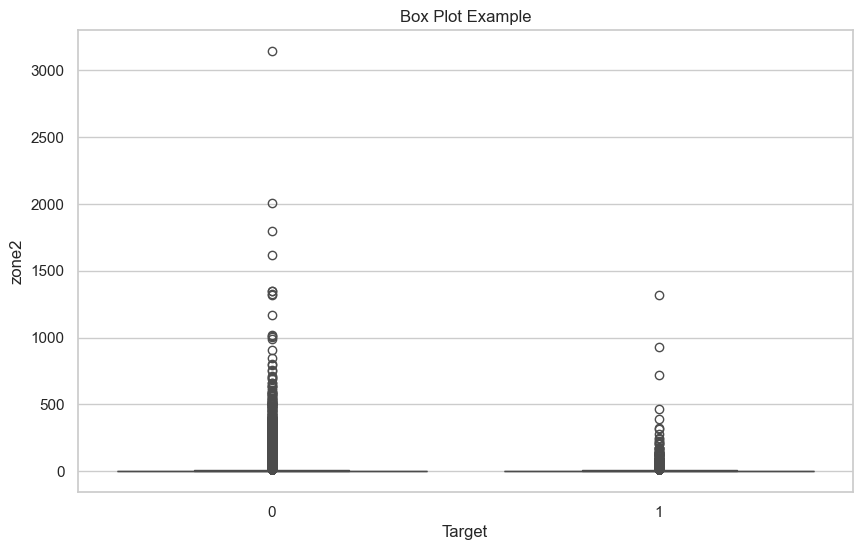

In [46]:
# Create a box plot using Seaborn
sns.set(style="whitegrid")  # Set the style of the plot
plt.figure(figsize=(10, 6))  # Set the size of the plot

sns.boxplot(data=train_data, x='Target', y='zone2')
plt.title('Box Plot Example')

# Show the plot
plt.show()

In [48]:
train_data['mrg'].value_counts()

NO    1507834
Name: mrg, dtype: int64

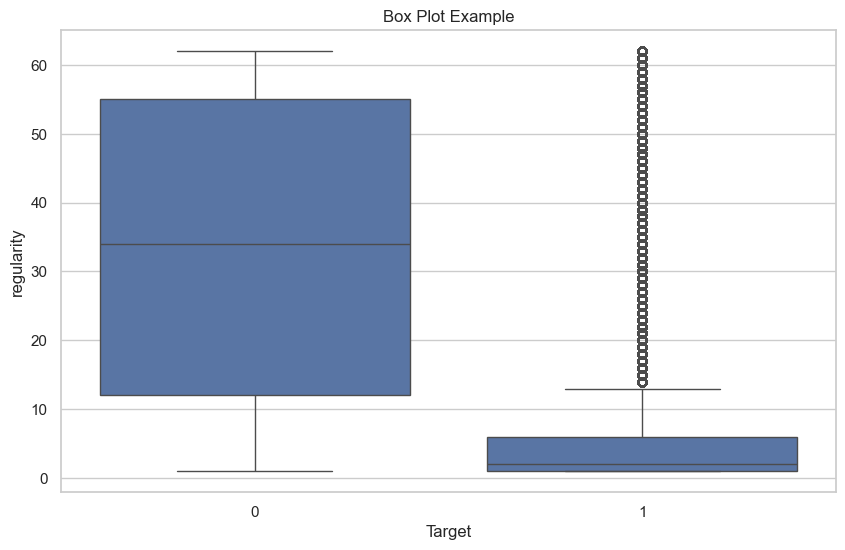

In [49]:
# Create a box plot using Seaborn
sns.set(style="whitegrid")  # Set the style of the plot
plt.figure(figsize=(10, 6))  # Set the size of the plot

sns.boxplot(data=train_data, x='Target', y='regularity')
plt.title('Box Plot Example')

# Show the plot
plt.show()

A very key feature - Its even a time dependent feature

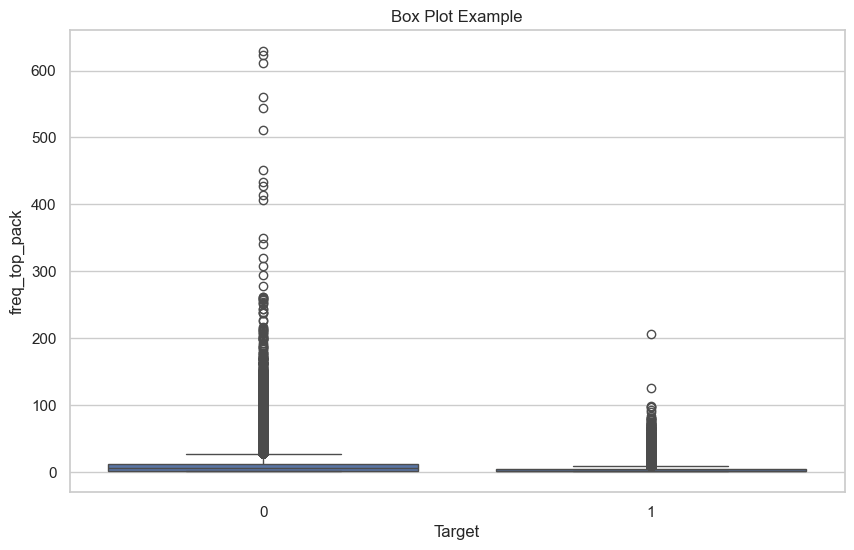

In [50]:
# Create a box plot using Seaborn
sns.set(style="whitegrid")  # Set the style of the plot
plt.figure(figsize=(10, 6))  # Set the size of the plot

sns.boxplot(data=train_data, x='Target', y='freq_top_pack')
plt.title('Box Plot Example')

# Show the plot
plt.show()

In [56]:
top_10 = dict(train_data['top_pack'].value_counts()[0:10])

In [59]:
top_10_list = list(top_10.keys())

In [1]:


# Create a box plot using Seaborn
sns.set(style="whitegrid")  # Set the style of the plot
plt.figure(figsize=(20, 12))  # Set the size of the plot

# Assuming df is your DataFrame with categorical and target variables
sns.countplot(x='top_pack', hue='Target', data=subset)
plt.title('Clustered Bar Plot of Churn Label across Top 10 top packs')
plt.xticks(rotation=90)  # Adjust the rotation angle as needed
plt.show()

NameError: name 'sns' is not defined

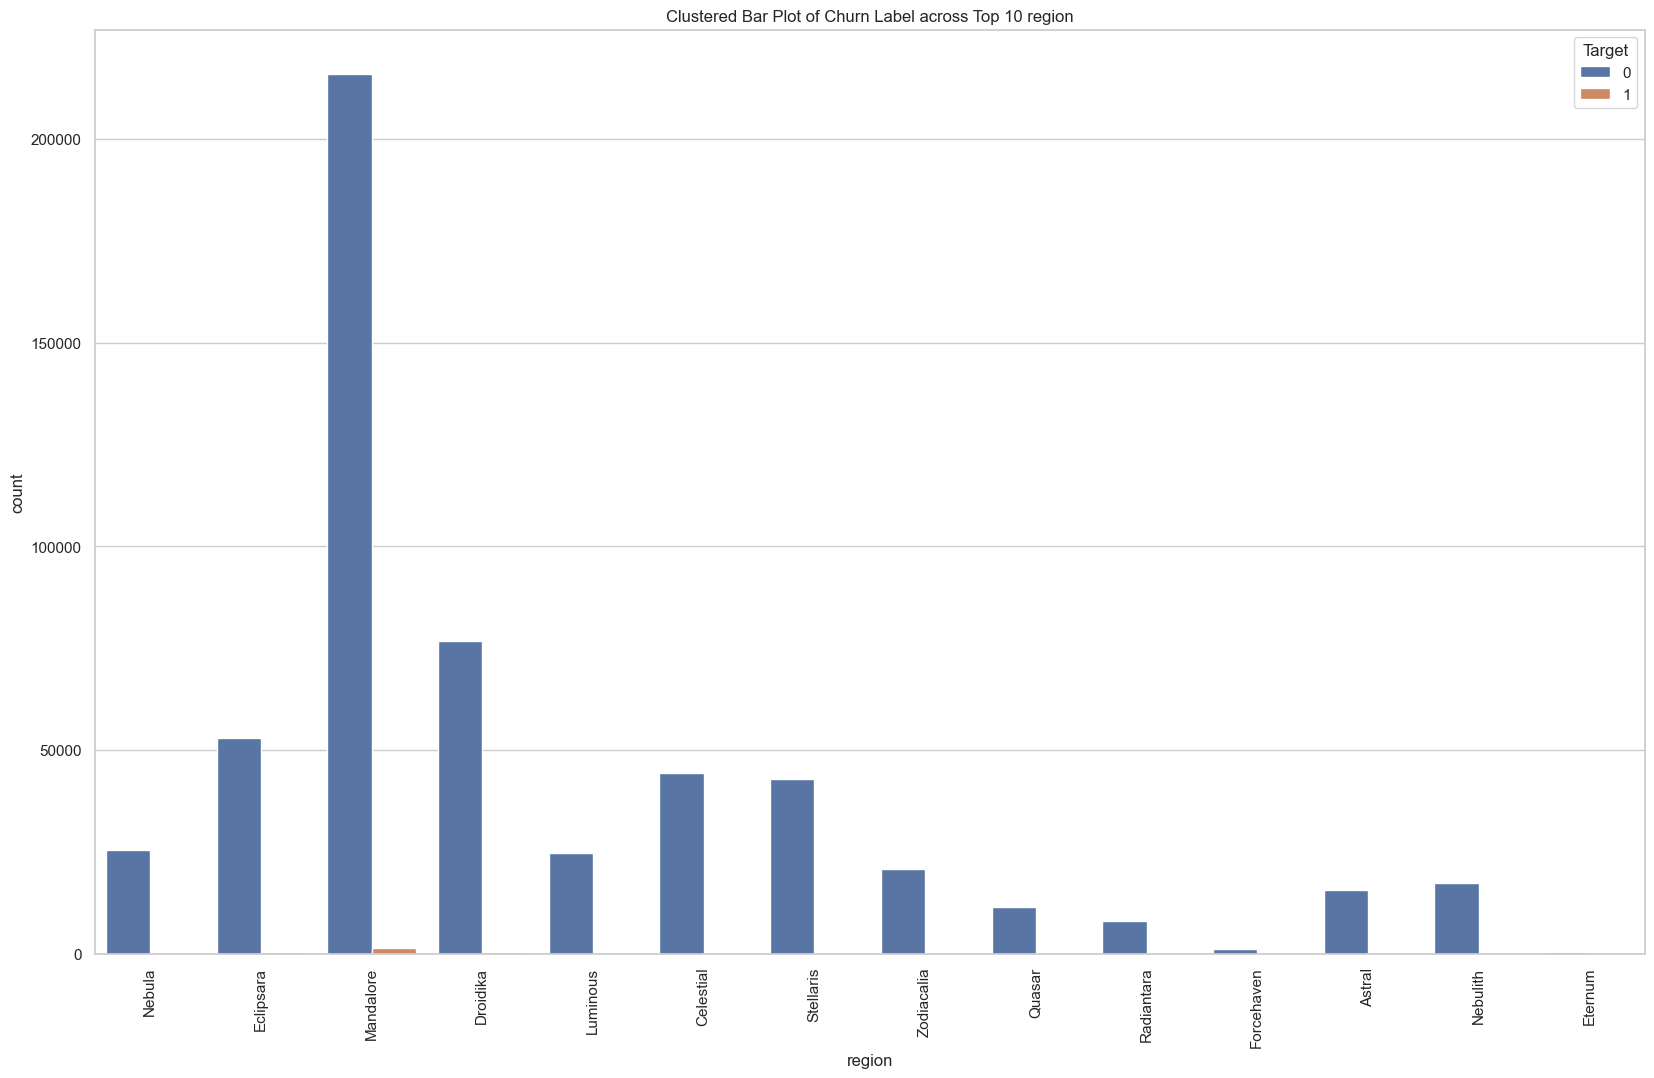

In [67]:


# Create a box plot using Seaborn
sns.set(style="whitegrid")  # Set the style of the plot
plt.figure(figsize=(20, 12))  # Set the size of the plot

# Assuming df is your DataFrame with categorical and target variables
sns.countplot(x='region', hue='Target', data=subset)
plt.title('Clustered Bar Plot of Churn Label across Top 10 region')
plt.xticks(rotation=90)  # Adjust the rotation angle as needed
plt.show()

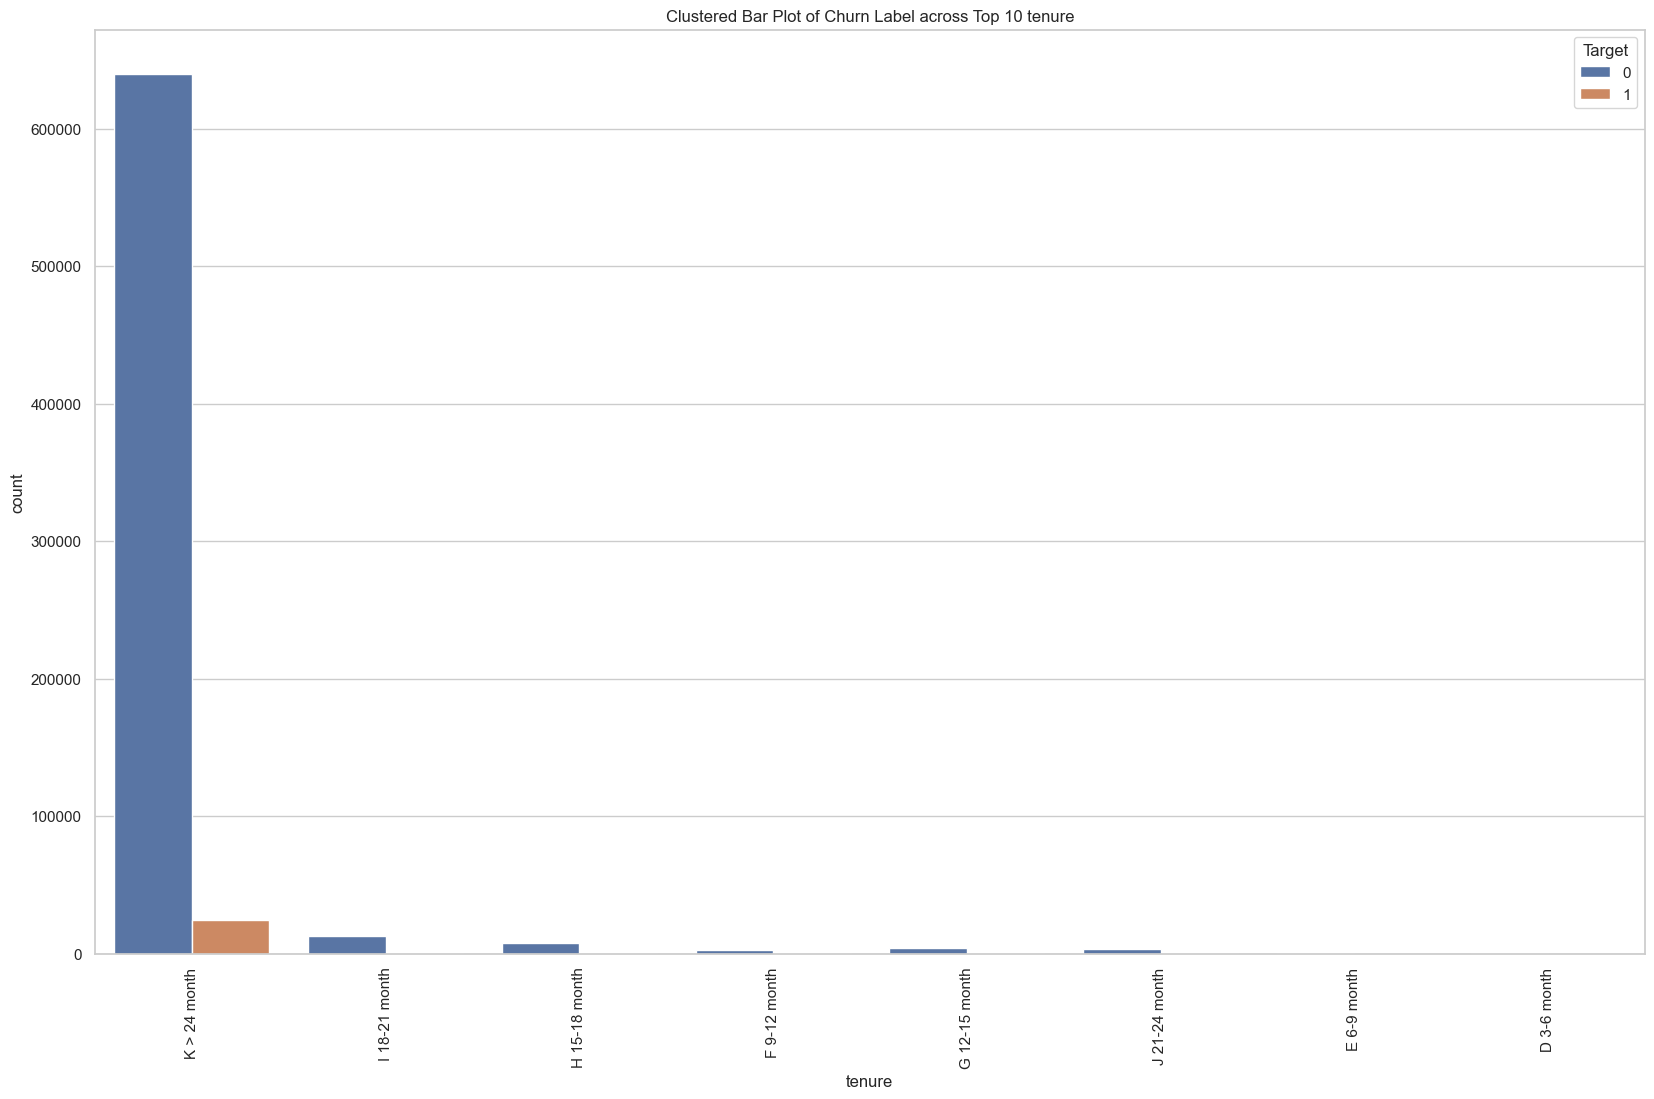

In [68]:


# Create a box plot using Seaborn
sns.set(style="whitegrid")  # Set the style of the plot
plt.figure(figsize=(20, 12))  # Set the size of the plot

# Assuming df is your DataFrame with categorical and target variables
sns.countplot(x='tenure', hue='Target', data=subset)
plt.title('Clustered Bar Plot of Churn Label across Top 10 tenure')
plt.xticks(rotation=90)  # Adjust the rotation angle as needed
plt.show()

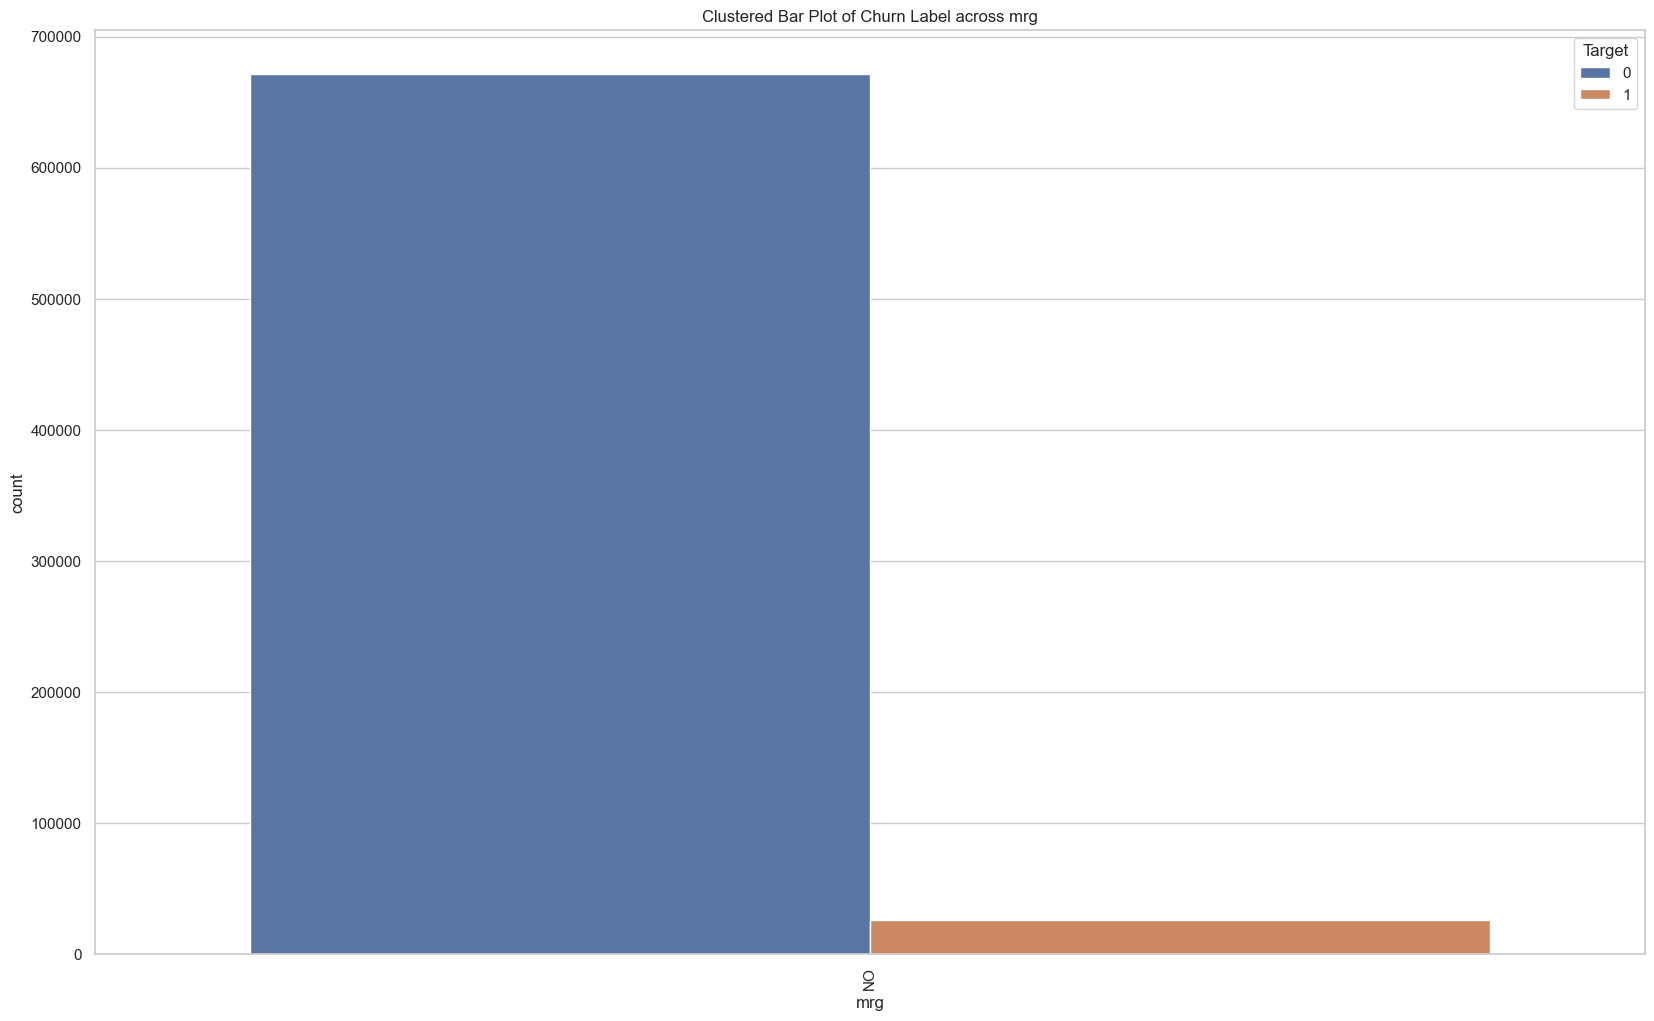

In [70]:


# Create a box plot using Seaborn
sns.set(style="whitegrid")  # Set the style of the plot
plt.figure(figsize=(20, 12))  # Set the size of the plot

# Assuming df is your DataFrame with categorical and target variables
sns.countplot(x='mrg', hue='Target', data=subset)
plt.title('Clustered Bar Plot of Churn Label across mrg')
plt.xticks(rotation=90)  # Adjust the rotation angle as needed
plt.show()

In [61]:
# List of values to filter on
categories_to_filter = top_10_list

# Slice the DataFrame based on the list of values in the 'Category' column
subset = train_data[train_data['top_pack'].isin(categories_to_filter)]


## Baseline Algorithm - Logistic Regression

In [78]:
# Drop all missing values
train_df = train_data.drop_duplicates()

In [79]:
train_df = train_df.dropna()

In [80]:
# Identify and remove categorical columns
non_categorical_columns = train_df.select_dtypes(exclude=['object']).columns
train_df = train_df[non_categorical_columns]

In [106]:
## Using min-max scaler
# Split the data into training and testing sets
train_data_ml, test_data_ml = train_test_split(train_df, test_size=0.2, random_state=42)

# Separate features and target variable
X_train_ml = train_data_ml.drop('Target', axis=1)
y_train_ml = train_data_ml['Target']

X_test_ml = test_data_ml.drop('Target', axis=1)
y_test_ml = test_data_ml['Target']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the scaler on the training data
X_train_ml_scaled = scaler.fit_transform(X_train_ml)

# Transform the testing data using the same scaler
X_test_ml_scaled = scaler.transform(X_test_ml)

# Convert the scaled data back to DataFrames
X_train_ml_scaled_df = pd.DataFrame(X_train_ml_scaled, columns=X_train_ml.columns)
X_train_ml_scaled_df.fillna(0, inplace=True)
X_test_ml_scaled_df = pd.DataFrame(X_test_ml_scaled, columns=X_test_ml.columns)
X_test_ml_scaled_df.fillna(0, inplace=True)

# # Display the original and scaled DataFrames for training and testing data
# print("Original Training Data:")
# print(X_train_ml)

# print("\nScaled Training Data:")
# print(X_train_ml_scaled_df)

# print("\nOriginal Testing Data:")
# print(X_test_ml)

# print("\nScaled Testing Data:")
# print(X_test_ml_scaled_df)

In [112]:
# Initialize Logistic Regression model
logreg_model = LogisticRegression()

# Fit the model on the scaled training data
logreg_model.fit(X_train_ml_scaled_df, y_train_ml)

# Predict on the scaled testing data
y_pred = logreg_model.predict(X_test_ml_scaled_df)

# Evaluate the model
accuracy = accuracy_score(y_test_ml, y_pred)
classification_report_str = classification_report(y_test_ml, y_pred, zero_division=True)

In [113]:
classification_report_str

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      1508\n           1       1.00      0.00      0.00         2\n\n    accuracy                           1.00      1510\n   macro avg       1.00      0.50      0.50      1510\nweighted avg       1.00      1.00      1.00      1510\n'

Carry this out this transformation on the submission (Orignal train data)

In [114]:
non_categorical_columns[:-1]

Index(['Amount', 'refill_frequency', 'revenue', 'arpu_segment', 'frequency',
       'data_volume', 'on_net', 'Procuct_1', 'Procuct_2', 'zone1', 'zone2',
       'regularity', 'freq_top_pack'],
      dtype='object')

In [115]:
# Removing categorical columns
test_data = test_data[non_categorical_columns[:-1]]


# Transform the testing data using the same scaler
X_test_scaled = scaler.transform(test_data)

# Convert the scaled data back to DataFrames
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=test_data.columns)

Make a prediction and submit baseline model

In [116]:
X_test_scaled_df.fillna(0, inplace=True)

In [117]:
# Predict on the scaled testing data
y_submission = logreg_model.predict(X_test_scaled_df)

In [118]:
submission_data = pd.read_csv('SampleSubmission.csv')

In [119]:
test_data.shape

(380127, 13)

In [120]:
submission_data.shape

(380127, 2)

In [121]:
submission_data = pd.read_csv('SampleSubmission.csv')
submission_data['Target'] = y_submission

submission_data.to_csv('baseline_model.csv', index=False)

In [123]:
# Confusion matrix

cm = confusion_matrix(y_test_ml, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[1508    0]
 [   2    0]]


In [125]:


accuracy = accuracy_score(y_test_ml, y_pred)
precision = precision_score(y_test_ml, y_pred)
recall = recall_score(y_test_ml, y_pred)
f1 = f1_score(y_test_ml, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9986754966887417
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


c:\Users\UKASHI\anaconda3\envs\e-library\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



In [126]:


classification_report_str = classification_report(y_test_ml, y_pred)
print("Classification Report:")
print(classification_report_str)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1508
           1       0.00      0.00      0.00         2

    accuracy                           1.00      1510
   macro avg       0.50      0.50      0.50      1510
weighted avg       1.00      1.00      1.00      1510



c:\Users\UKASHI\anaconda3\envs\e-library\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\UKASHI\anaconda3\envs\e-library\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\UKASHI\anaconda3\envs\e-library\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



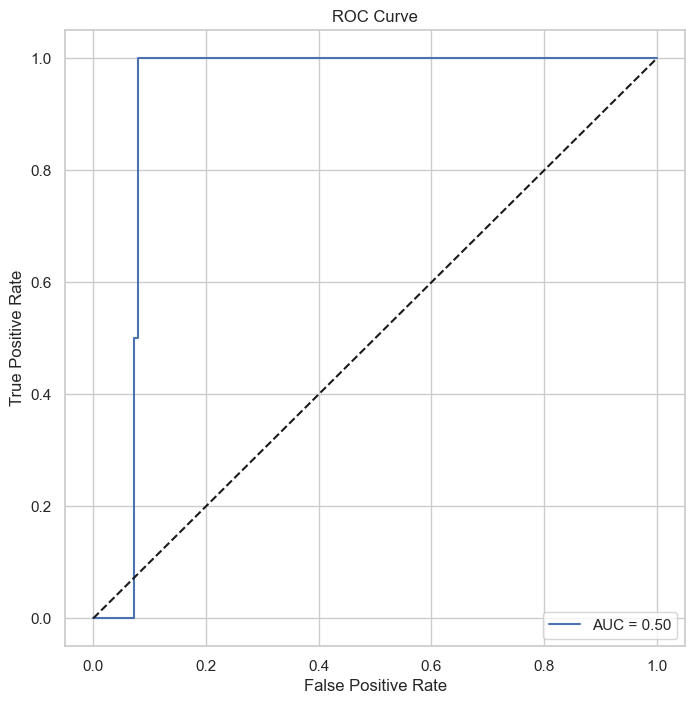

In [134]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_ml, logreg_model.predict_proba(X_test_ml_scaled_df)[:, 1])
auc = roc_auc_score(y_test_ml, y_pred)

# Plot ROC Curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [136]:
feature_importance = pd.DataFrame({'Feature': X_test_ml_scaled_df.columns, 'Coefficient': logreg_model.coef_[0]})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)
print("Feature Importance:")
print(feature_importance)


Feature Importance:
             Feature  Coefficient
8          Procuct_2     0.132709
10             zone2     0.048346
9              zone1     0.041540
0             Amount     0.009421
5        data_volume     0.006725
3       arpu_segment     0.004313
2            revenue     0.004309
7          Procuct_1    -0.016859
6             on_net    -0.041288
12     freq_top_pack    -0.124521
1   refill_frequency    -0.241862
4          frequency    -0.551428
11        regularity    -2.402301


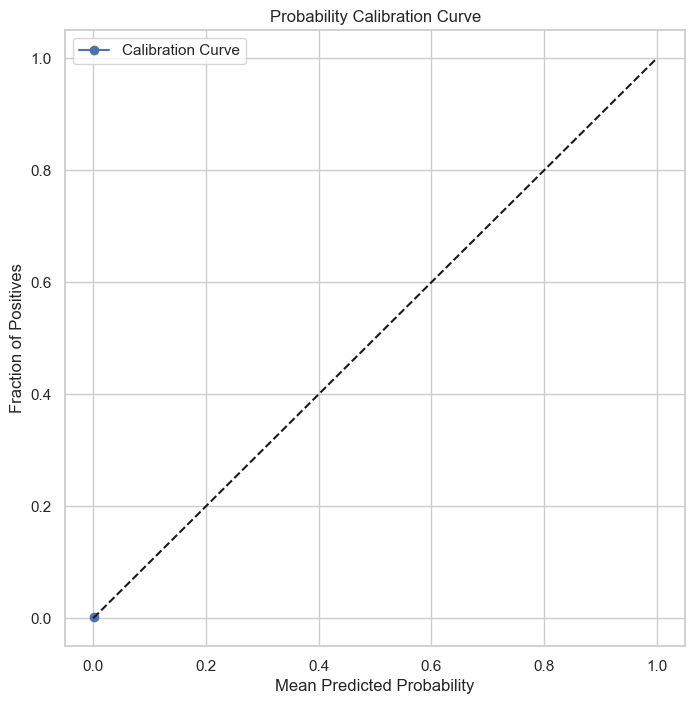

In [140]:
# Calibration Curve
prob_true, prob_pred = calibration_curve(y_test_ml, logreg_model.predict_proba(X_test_ml_scaled_df)[:, 1], n_bins=10)

# Plot Calibration Curve
plt.figure(figsize=(8, 8))
plt.plot(prob_pred, prob_true, marker='o', linestyle='-', label='Calibration Curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Probability Calibration Curve')
plt.legend()
plt.show()